In [19]:
# 0. Bibliotheken importieren
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [20]:
# 1. Daten laden
df = pd.read_csv('../../data/cleaned_diabetes.csv')

In [21]:
# 2. Features und Zielspalte
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [22]:
# 3. Stratified K-Fold einrichten
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
# 4. Metriken speichern
precision_list = []
recall_list = []
f1_list = []
auc_list = []

mean_fpr = np.linspace(0, 1, 100)
tprs = []


In [24]:
# 5. Cross-Validation Schleife
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(class_weight='balanced', max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metriken berechnen
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)
    auc_list.append(auc)

    # ROC-Kurve für jeden Fold
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tprs.append(tpr_interp)

    print(f"Fold {fold}: Precision={precision_list[-1]:.2f}, Recall={recall_list[-1]:.2f}, F1={f1_list[-1]:.2f}, AUC={auc:.2f}")

Fold 1: Precision=0.58, Recall=0.78, F1=0.67, AUC=0.84
Fold 2: Precision=0.75, Recall=0.80, F1=0.77, AUC=0.87
Fold 3: Precision=0.62, Recall=0.76, F1=0.68, AUC=0.85
Fold 4: Precision=0.65, Recall=0.74, F1=0.69, AUC=0.84
Fold 5: Precision=0.53, Recall=0.75, F1=0.62, AUC=0.81


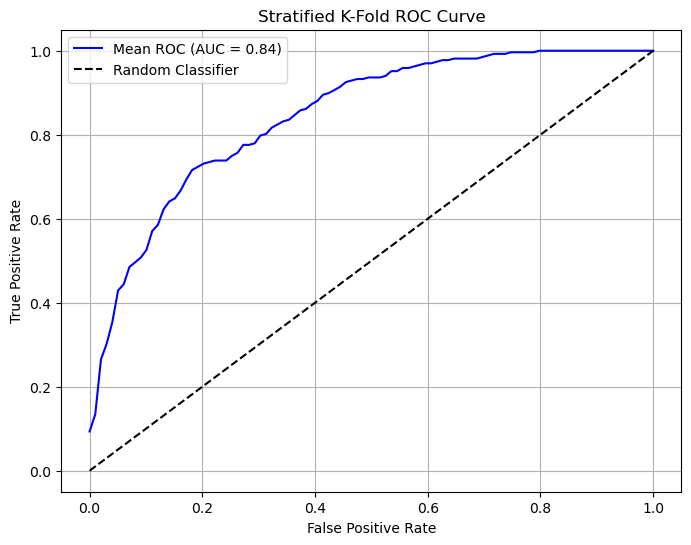

In [25]:
# 6. Durchschnittliche ROC-Kurve zeichnen
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(auc_list)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stratified K-Fold ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [26]:
# 7. Durchschnittliche Metriken
print("\nDurchschnittliche Werte über alle Folds:")
print(f"Precision: {np.mean(precision_list):.2f}")
print(f"Recall:    {np.mean(recall_list):.2f}")
print(f"F1 Score:  {np.mean(f1_list):.2f}")
print(f"AUC Score: {mean_auc:.2f}")


Durchschnittliche Werte über alle Folds:
Precision: 0.63
Recall:    0.76
F1 Score:  0.69
AUC Score: 0.84
